In [219]:
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn


In [220]:
def parse_data(file):
    for l in open(file,'r'):
        yield json.loads(l)
        

data = list(parse_data('sar.json'))

In [221]:
df = pd.DataFrame(data)
df.drop('article_link',axis=1,inplace=True)
df.head()

,headline,is_sarcastic
0,the 'roseanne' revival catches up to our thorn...,0
1,mom starting to fear son's web series closest ...,1
2,"boehner just wants wife to listen, not come up...",1
3,j.k. rowling wishes snape happy birthday in th...,0
4,advancing the world's women,0


In [222]:
x=(df['headline'])
y=df['is_sarcastic']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,stratify=y)

In [223]:

padding_type='post'
tokenizer= Tokenizer(10000,oov_token='<OOV>')
tokenizer.fit_on_texts(x_train)
sequences=tokenizer.texts_to_sequences(x_train)
train_paded = pad_sequences(sequences,padding=padding_type,maxlen=100)


sequences=tokenizer.texts_to_sequences(x_test)
test_paded=pad_sequences(sequences,padding=padding_type,maxlen=100)




In [224]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(10000,16,input_length=100),
     tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [225]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_30 (Embedding)    (None, 100, 16)           160000    
                                                                 
 dropout_8 (Dropout)         (None, 100, 16)           0         
                                                                 
 global_average_pooling1d_2   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_69 (Dense)            (None, 128)               2176      
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_70 (Dense)            (None, 64)                8256      
                                                     

In [226]:
history = model.fit(train_paded,y_train,epochs=10 , validation_data=(test_paded, y_test))

Epoch 1/10
668/668 [==============================] - 2s 3ms/step - loss: 0.6006 - accuracy: 0.6469 - val_loss: 0.3808 - val_accuracy: 0.8370
Epoch 2/10
668/668 [==============================] - 2s 3ms/step - loss: 0.3406 - accuracy: 0.8605 - val_loss: 0.3523 - val_accuracy: 0.8469
Epoch 3/10
668/668 [==============================] - 2s 3ms/step - loss: 0.2668 - accuracy: 0.8960 - val_loss: 0.3546 - val_accuracy: 0.8568
Epoch 4/10
668/668 [==============================] - 2s 3ms/step - loss: 0.2235 - accuracy: 0.9167 - val_loss: 0.3651 - val_accuracy: 0.8508
Epoch 5/10
668/668 [==============================] - 2s 3ms/step - loss: 0.1922 - accuracy: 0.9297 - val_loss: 0.4276 - val_accuracy: 0.8209
Epoch 6/10
668/668 [==============================] - 2s 3ms/step - loss: 0.1705 - accuracy: 0.9394 - val_loss: 0.4184 - val_accuracy: 0.8469
Epoch 7/10
668/668 [==============================] - 2s 3ms/step - loss: 0.1532 - accuracy: 0.9447 - val_loss: 0.4272 - val_accuracy: 0.8351
Epoch 

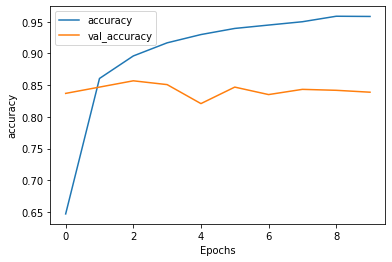

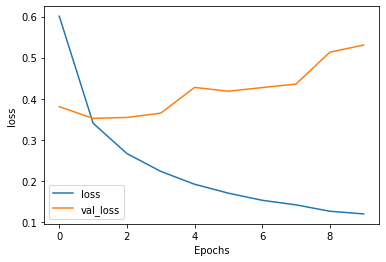

In [227]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [228]:
y_pred=model.predict(train_paded)


In [229]:
preds = model.predict(test_paded).flatten()
y_predict = []
for i in preds:
    if i < 0.5:
        y_predict.append(0)
    else:
        y_predict.append(1)
y_predict[:5]

[1, 0, 0, 0, 0]

In [230]:
cm=confusion_matrix(y_test,y_predict)

<AxesSubplot:>

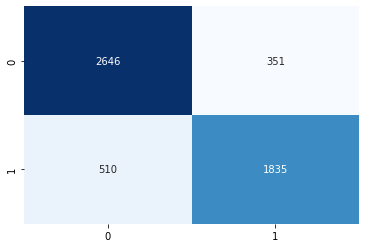

In [231]:
seaborn.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)